In [1]:
from glob import glob
import os
from pathlib import Path
import shutil
import urllib.request as request
from contextlib import closing

import matplotlib.pyplot as plt
import pygrib
import xarray as xr
import numpy as np
import cartopy.feature as cfeature
from cartopy import crs as ccrs
from metpy.plots import USCOUNTIES, ctables
from datetime import datetime
from dateutil import tz

In [2]:
grib_dir = Path('.') / 'data'
graphics_dir = Path('.') / '..' / '..' / 'graphics' / 'nhc'

In [84]:
# Read in files and acquire data needed for plotting
ds = pygrib.open(glob(f'{grib_dir}/AL*.grib2')[0])

ds.seek(0)
ds = ds[4]

# Extract lats, lons, and data values
lats, lons = ds.latlons()
values = ds.values

print(type(values))

<class 'numpy.ma.core.MaskedArray'>


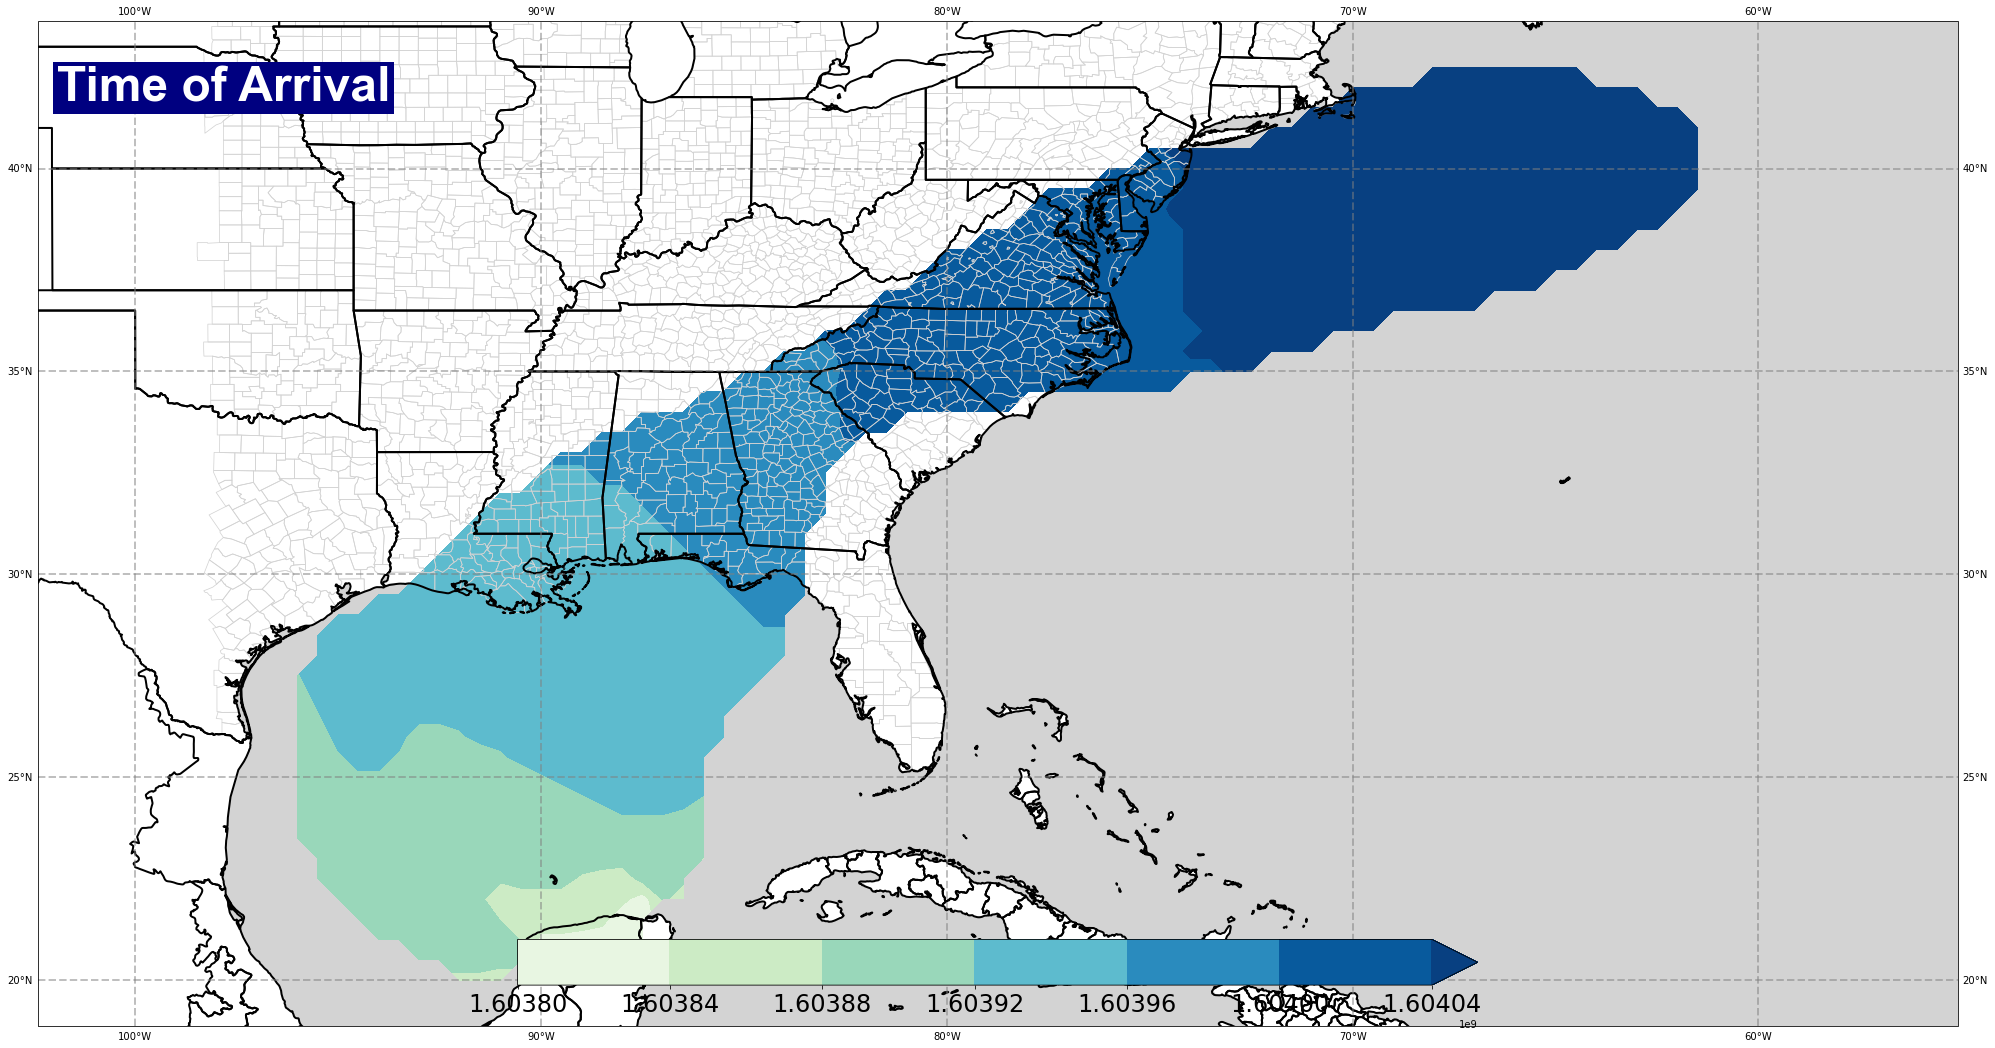

In [88]:
fig = plt.figure(figsize=(1920/72, 1080/72))
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.PlateCarree())

ax.add_feature(cfeature.OCEAN.with_scale('50m'), color='lightgray')
ax.add_feature(USCOUNTIES.with_scale('20m'), edgecolor='lightgray', linewidth=0.75)
ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=2.0)
ax.set_adjustable('datalim')
# ax.set_extent([left_lon - 6, right_lon + 6, bottom_lat - 8, top_lat + 7])
#ax.set_extent([360-95, 360-75, 23, 33.5], ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')


contour = ax.contourf(lons, lats, values, cmap=plt.cm.GnBu, 
                      extend='max', transform=ccrs.PlateCarree())

cbar = plt.colorbar(contour, orientation='horizontal', pad=-0.08, shrink=0.5,)
cbar.ax.tick_params(labelsize='24')

# Make the axis title
ax.set_title(f'Time of Arrival', loc='left', 
             ha='left', va='top', fontsize=48, fontname='Arial',
             color='white', fontweight='bold', y=0.95, x=0.01,
             bbox=dict(facecolor='navy', alpha=1.0, edgecolor='none'))

# Save and show figure
plt.savefig(f'{graphics_dir}/toa.png', dpi=72)
plt.show()